# Predicting Financial Distress: Initial Exploration
- Dataset can be found at: https://www.kaggle.com/c/GiveMeSomeCredit
    - Contains historical data on 150,000 borrowers
        - Labels are binary: defaulted or didn't default (SeriousDlqin2yrs)
    - Goal is to predict default risk on holdout set

## Step 1: Splitting Data
- Ingest data
- Immediately split data into training and testing set to avoid bias
    - Want to perform this step without actually looking at the data
    - Once split, explore training set to determine cleaning steps

### Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

### Ingest Data as DataFrame

In [2]:
# read in csv as dataframe and look at column names
all_data = pd.read_csv('../data/cs-training.csv')

#### Columns
- Before we split the data, we need to know what the target class (column) is.
    - We know from the dataset description that SeriousDlqin2yrs is the target class, so will drop it to create X (predictors) and isolate it to create y (target)
    - After splitting, all cleaning steps will be done on X_train, then encapsulated in a function
        - This function will be run on X_test to pre-process before model is run.
- It is ok to look at the column names at this stage (does not constitute introducing bias)

In [3]:
# Look at column names
all_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [4]:
# split dataframe into training and testing arrays
X = all_data.drop('SeriousDlqin2yrs', axis=1)
y = all_data.SeriousDlqin2yrs

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# original copy for debugging
X_train_copy = X_train.copy()

#### Now it is acceptable to view the training data
- Now we will summarize training data to scope the data cleaning

## Step 2: Exploring dataset
- Want to determine cleaning steps

In [6]:
# look at dataframe
X_train.head()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
92988,92989,0.182486,53,0,0.217973,8000.0,8,0,1,0,2.0
43658,43659,0.000916,45,0,0.238913,28750.0,7,0,3,0,2.0
110698,110699,0.149620,58,0,0.101878,9000.0,7,0,0,0,0.0
77130,77131,1.000000,22,0,0.000000,929.0,1,0,0,0,0.0
109216,109217,0.057441,33,0,0.428893,4000.0,6,0,1,0,4.0


In [7]:
# investigate Null values and datatypes
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112500 entries, 92988 to 121958
Data columns (total 11 columns):
Unnamed: 0                              112500 non-null int64
RevolvingUtilizationOfUnsecuredLines    112500 non-null float64
age                                     112500 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    112500 non-null int64
DebtRatio                               112500 non-null float64
MonthlyIncome                           90223 non-null float64
NumberOfOpenCreditLinesAndLoans         112500 non-null int64
NumberOfTimes90DaysLate                 112500 non-null int64
NumberRealEstateLoansOrLines            112500 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    112500 non-null int64
NumberOfDependents                      109562 non-null float64
dtypes: float64(4), int64(7)
memory usage: 10.3 MB


In [8]:
# statistical summary
X_train.describe()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112500.000000,112500.000000,112500.000000,112500.000000,112500.000000,9.022300e+04,112500.000000,112500.000000,112500.000000,112500.000000,109562.000000
mean,74961.876676,5.695359,52.288302,0.424062,351.962978,6.682989e+03,8.461564,0.267209,1.018924,0.241316,0.758475
std,43333.928533,251.578602,14.766866,4.206304,1978.923775,1.561086e+04,5.145291,4.182446,1.130766,4.168206,1.117452
min,2.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37449.750000,0.030106,41.000000,0.000000,0.175877,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,74889.500000,0.155192,52.000000,0.000000,0.367473,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112530.250000,0.559117,63.000000,0.000000,0.871193,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,50708.000000,109.000000,98.000000,326442.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,13.000000


In [9]:
# ensure y_train looks right
y_train.head()

92988     0
43658     0
110698    0
77130     0
109216    0
Name: SeriousDlqin2yrs, dtype: int64

In [10]:
# ensure no null values in target
y_train.isnull().sum()

0

#### *Note: feature histograms would go here*

#### Looking at the training set summary, we see that we need to:
- X_train
    - Reset index
    - Cast all columns as float64
    - Remove Unnamed: 0 column, as it is a copy of the index
    - Deal with outliers
        - NumberOfTimes90DaysLate column, for example, has a mean of .26, with a SD of 4.18, but a maximum value of 98.
    - Deal with Null values in the MonthlyIncome and NumberofDependents column
- y_train
    - Reset index
    - Cast as float64 for consistency

## Step 3: Easy Cleaning
- perform column dropping, index resetting, and casting

In [11]:
# drop redundant column
X_train = X_train.drop('Unnamed: 0', axis=1)

# reset index (X_train is a result of sampling and thus has a random index)
X_train = X_train.reset_index(drop=True)

# cast dataframe as all float64
X_train = X_train.astype(float, copy=True)

In [12]:
# reset index (X_train is a result of sampling and thus has a random index)
y_train = y_train.reset_index(drop=True)

# cast dataframe as all float64
y_train = y_train.astype(float, copy=True)

## Step 4: Dealing with outliers
- as mentioned above, there are some potential outliers in the dataset
    - common in data entry to record way out of range values to mean "Unknown" or "Would not say"
        - common numbers used for this purpose are 98 and 96
    - other outliers could be typos, or other errors (entering yearly rather than monthly income, for example)
- as a way to deal with this, we will remove all values that are above or below 3 standard deviations on a column-by-column basis
    - We will replace these values with Null values, then deal with the Null values in one step

In [13]:
# function takes dataframe, column name, and the number of standard deviations,
#     returns dataframe with the designated column modified to replace values outside
#     that number of standard devations with NaN. Has to be run on each column.

def mask_column_outliers(dataframe, column_name, num_std_dv):
    dataframe_copy = dataframe.copy()
    col_std_dv = dataframe_copy[column_name].std()
    col_mean = dataframe_copy[column_name].mean()
    upper_bound = col_mean + (col_std_dv * num_std_dv)
    lower_bound = col_mean - (col_std_dv * num_std_dv)
    
    dataframe_copy[column_name] = dataframe_copy[column_name].mask(dataframe_copy[column_name] > upper_bound)
    dataframe_copy[column_name] = dataframe_copy[column_name].mask(dataframe_copy[column_name] < lower_bound)
    return dataframe_copy

In [14]:
# function takes in dataframe, iterates over columns and runs mask_outliers on each
def mask_dataframe_outliers(dataframe, num_std_dv):
    dataframe_copy = dataframe.copy()
    for column in dataframe_copy:
        dataframe_copy = mask_column_outliers(dataframe_copy, column, num_std_dv)
    return dataframe_copy

In [15]:
# use function to mask all outliers

X_train = mask_dataframe_outliers(X_train, 1000000)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112500 entries, 0 to 112499
Data columns (total 10 columns):
RevolvingUtilizationOfUnsecuredLines    112500 non-null float64
age                                     112500 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    112500 non-null float64
DebtRatio                               112500 non-null float64
MonthlyIncome                           90223 non-null float64
NumberOfOpenCreditLinesAndLoans         112500 non-null float64
NumberOfTimes90DaysLate                 112500 non-null float64
NumberRealEstateLoansOrLines            112500 non-null float64
NumberOfTime60-89DaysPastDueNotWorse    112500 non-null float64
NumberOfDependents                      109562 non-null float64
dtypes: float64(10)
memory usage: 8.6 MB


#### Note: this method seems very lossy
- May be better to decide a per-column number of standard deviations to exclude
    - May be a good approach to get rid of errors in age column for example
    - May not be a good approach for MonthlyIncome column (wide income disparity)

## Step 5: Dealing with Null values
- Here we have 3 options
    1. Drop rows that contain Null values
        - Easiest, but most lossy option
    2. Impute values based on column median (2a) or binned median, like per age group median (2b)
        - Less lossy, not much harder
    3. Create regression models for each column and impute missing values based on models
        - Most labor intensive, but least lossy
- For now, will pick option 2. May have to go with option 3 if the model has poor evaluation metrics.

### Option 2a:
- imputing based on column median

In [16]:
# # define function to replace Null values with column median (option 2a)
# def replace_column_nans(dataframe, column_name):
#     dataframe_copy = dataframe.copy()
#     col_median = dataframe_copy[column_name].median()
#     dataframe_copy[column_name] = dataframe_copy[column_name].fillna(col_median)
#     return dataframe_copy

In [17]:
# # define function to iterate over dataframe columns and call replace_column_nans for each
# def replace_dataframe_nans_colmed(dataframe):
#     dataframe_copy = dataframe.copy()
#     for column in dataframe_copy:
#         dataframe_copy = replace_column_nans(dataframe_copy, column)
#     return dataframe_copy

In [18]:
# # run function on dataframe
# X_train = replace_dataframe_nans_colmed(X_train)

In [19]:
# X_train.info()

### Option 2b:
- imputing based on median for age group
    - will find median monthly income for each age
    - create a reference dataframe to lookup median
        - impute any missing values by forward-filling, then back-filling
    - then will iterate through rows, reading age and setting median from lookup table

In [20]:
# create dataframe of monthly income median for each age

age_lookup = pd.DataFrame(X_train.groupby('age').median())
age_lookup.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
age,,,,,,,,,
21.0,0.999021,0.0,0.004301,929.0,1.0,0.0,0.0,0.0,0.0
22.0,0.735529,0.0,0.019558,929.0,1.0,0.0,0.0,0.0,0.0
23.0,0.654267,0.0,0.047735,1400.0,2.0,0.0,0.0,0.0,0.0
24.0,0.497501,0.0,0.129502,1600.0,3.0,0.0,0.0,0.0,0.0
25.0,0.431054,0.0,0.177649,2205.5,3.0,0.0,0.0,0.0,0.0


In [21]:
age_lookup.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 85 entries, 21.0 to 109.0
Data columns (total 9 columns):
RevolvingUtilizationOfUnsecuredLines    85 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    85 non-null float64
DebtRatio                               85 non-null float64
MonthlyIncome                           82 non-null float64
NumberOfOpenCreditLinesAndLoans         85 non-null float64
NumberOfTimes90DaysLate                 85 non-null float64
NumberRealEstateLoansOrLines            85 non-null float64
NumberOfTime60-89DaysPastDueNotWorse    85 non-null float64
NumberOfDependents                      83 non-null float64
dtypes: float64(9)
memory usage: 6.6 KB


#### First, it looks like there are some ages without data
- MonthlyIncome and NumberOfDependents have some missing values
    - Will impute these by taking the value in the row above it (called pad method, or propagating non-NA values forward)
        - Would normally take the mean of the values above and below it, but those may be NaN as well.

In [22]:
# investigate Null values
print('Missing values in age lookup table:')
for index, row in age_lookup.iterrows():
    if np.isnan(row['MonthlyIncome']) or np.isnan(row['NumberOfDependents']):
        print('\nAge:', index,
              '\nMonthlyIncome:', row['MonthlyIncome'],
              '\nNumberOfDependents:', row['NumberOfDependents'])

Missing values in age lookup table:

Age: 105.0 
MonthlyIncome: nan 
NumberOfDependents: nan

Age: 107.0 
MonthlyIncome: nan 
NumberOfDependents: 0.0

Age: 109.0 
MonthlyIncome: nan 
NumberOfDependents: nan


In [23]:
# DataFrame.fillna(method='pad') will propagate non-Null values forward
# We will perform forward padding (all that is needed for this training set) followed by
# backward padding (backfill) in case the testing set has Null values at the beginning of the column
def pad_dataframe(dataframe):
    dataframe_copy = dataframe.copy()
    dataframe_copy = dataframe_copy.fillna(method='pad')
    dataframe_copy = dataframe_copy.fillna(method='bfill')
    return dataframe_copy

In [24]:
# run function on age_lookup
age_lookup = pad_dataframe(age_lookup)

In [25]:
age_lookup.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 85 entries, 21.0 to 109.0
Data columns (total 9 columns):
RevolvingUtilizationOfUnsecuredLines    85 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    85 non-null float64
DebtRatio                               85 non-null float64
MonthlyIncome                           85 non-null float64
NumberOfOpenCreditLinesAndLoans         85 non-null float64
NumberOfTimes90DaysLate                 85 non-null float64
NumberRealEstateLoansOrLines            85 non-null float64
NumberOfTime60-89DaysPastDueNotWorse    85 non-null float64
NumberOfDependents                      85 non-null float64
dtypes: float64(9)
memory usage: 6.6 KB


#### Now the lookup dataframe is ready to be referenced (no missing values)
- Next step is to iterate through training data, replacing null values with the median value for that row's age

In [26]:
# nulls before running function
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112500 entries, 0 to 112499
Data columns (total 10 columns):
RevolvingUtilizationOfUnsecuredLines    112500 non-null float64
age                                     112500 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    112500 non-null float64
DebtRatio                               112500 non-null float64
MonthlyIncome                           90223 non-null float64
NumberOfOpenCreditLinesAndLoans         112500 non-null float64
NumberOfTimes90DaysLate                 112500 non-null float64
NumberRealEstateLoansOrLines            112500 non-null float64
NumberOfTime60-89DaysPastDueNotWorse    112500 non-null float64
NumberOfDependents                      109562 non-null float64
dtypes: float64(10)
memory usage: 8.6 MB


In [27]:
# define function to take a dataframe, look for NaN, replace with age group median

def replace_column_nans_agemed(dataframe, column_name, lookup_dataframe):
    dataframe_copy = dataframe.copy()
    for index, row in dataframe_copy.iterrows():
        age = row['age']
        age_median_value = lookup_dataframe.loc[age, column_name]
        if np.isnan(row[column_name]):
            row[column_name] = age_median_value
    return dataframe_copy

In [28]:
# define function to iterate through columns and call replace_column_nans_agemed, skip age

def replace_dataframe_nans_agemed(dataframe, lookup_dataframe):
    dataframe_copy = dataframe.copy()
    for column in dataframe_copy:
        # skip age column, because it does not exist in age_lookup dataframe
        if column != 'age':
            dataframe_copy = replace_column_nans_agemed(dataframe_copy, column, lookup_dataframe)    
    return dataframe_copy

In [29]:
# execute function on X_train (takes a few seconds to run)

X_train = replace_dataframe_nans_agemed(X_train, age_lookup)

In [30]:
# nulls after running function
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112500 entries, 0 to 112499
Data columns (total 10 columns):
RevolvingUtilizationOfUnsecuredLines    112500 non-null float64
age                                     112500 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    112500 non-null float64
DebtRatio                               112500 non-null float64
MonthlyIncome                           112500 non-null float64
NumberOfOpenCreditLinesAndLoans         112500 non-null float64
NumberOfTimes90DaysLate                 112500 non-null float64
NumberRealEstateLoansOrLines            112500 non-null float64
NumberOfTime60-89DaysPastDueNotWorse    112500 non-null float64
NumberOfDependents                      112500 non-null float64
dtypes: float64(10)
memory usage: 8.6 MB


## Regression to find missing values and outliers: Prospective (option 3)

### Possible pipeline:
- create regression model for each column
- use regression model to impute missing values

- need to make a function that takes in the whole drop cleaned data frame
    - splits data frame into target and predictors
    - fits regression model
        - evaluates model
        - prints accuracy score
        - stores model
- need second function that flags values to replace in original df
    - calculates mean for each column, standard deviation, median
    - flags anything that is above or below 3SD
    - flags NaN values
    - for any value that needs to be replaced, other values are fed into appropriate model
    - if two values are missing, the first is imputed by median, then second is regressed

In [31]:
# will try option 3 if model performs poorly

## Step 6: Checking for class balance
- It is a good idea at this stage to check the relative proportion of each target class in the training data.
    - Unbalanced classes can create high baseline accuracy scores, as the model considers it safest to always predict the majority class

Text(0.5,1,'Frequency Distribution\n of Default vs. No Default')

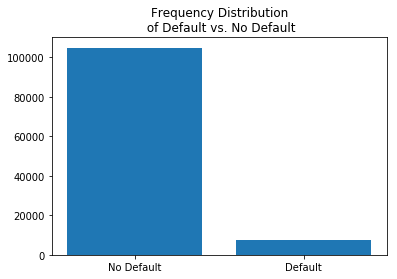

In [32]:
# plot frequency distribution
a = y_train.value_counts().index
b = y_train.value_counts()[0:2]
plt.bar(a, b)
plt.xticks(a, ['No Default', 'Default'])
plt.title('Frequency Distribution\n of Default vs. No Default')

In [33]:
# print default rate
print(y_train.value_counts()[1] / y_train.value_counts()[0] * 100, '% Defaulted')

7.194923248434954 % Defaulted


#### Unbalanced classes
- Here we can see that defaults are much more rare than no-defaults.
- Looking ahead, we can deal with this in a few ways:
    - Undersampling (randomly eliminating instances of the majority class in the training set to balance the two)
    - Oversampling (randomly inserting instances of the minority class into the training set to balance the two)
    - Penalized models (Logit)
    - Ensemble models
- Knowing the classes are unbalanced, we will need to use evaluation metrics besides accuracy, like:
    - Plotting ROC curve and calculating AUC (competition this dataset comes from uses AUC as the scoring metric for submitted predictions)

## Step 7: Checking for multicollinearity
- Will produce a correlation heatmap to investigate feature-to-feature correlation

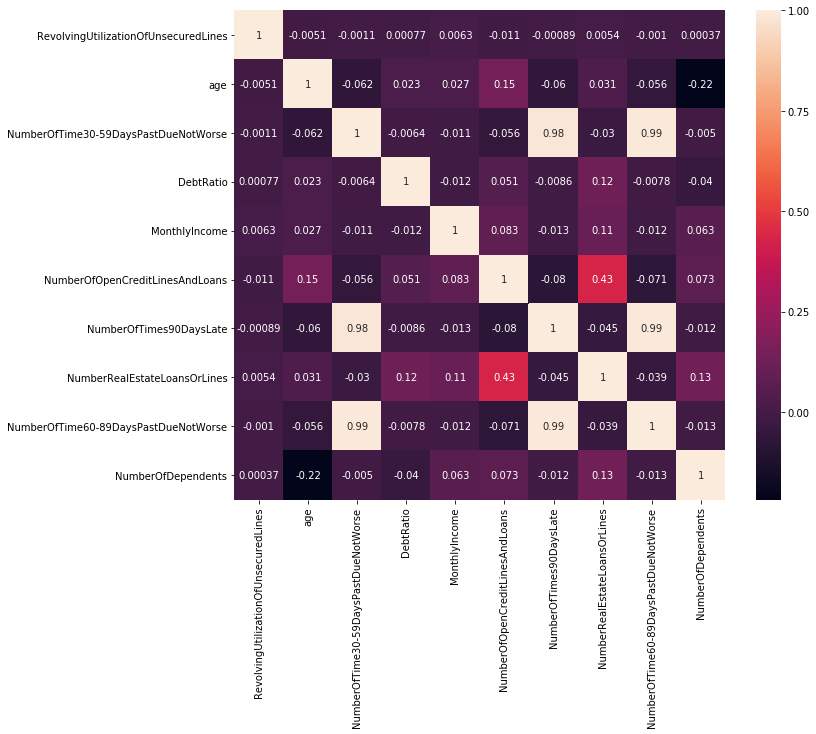

In [34]:
plt.figure(figsize=(11,9))
sns.heatmap(X_train.corr(), annot=True, fmt=".2g")

#### Here we can see some potential redundancies:
- NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, and NumberOfTimes90DaysLate are highly correlated with each other. Options:
    1. Drop 2 of these features
    2. Create a column that combines the three features by summing them together (call it NumberOfTimesPastDue)
- NumberRealEstateLoansOrLines and NumberOfOpenCreditLinesAndLoans are correlated with each other, likely because the former makes up a portion of the latter. 

## Step 8: Feature Engineering
- https://elitedatascience.com/feature-engineering-best-practices
- Possible indicator variables:
    - Could have everyone above a MonthlyIncome of above 10,000 labelled with a one in a new HighIncome column
    - Could have everyone who has a NumberofTimesPastDue lower than 5 labelled with a one in a new RarelyLate column
    - Could have everyone who is under 21 labelled with a one in a new IsYoung column
    - Could have everyone who is over 65 labelled with a one in a new OfRetirementAge column
- Possible interaction features:
    - Debt load vs. monthlyincome?
    - Looking at the data dictionary, some fields are calculated:
        - DebtRatio, for example, is (monthly debt payments + alimony + and living costs) / monthly gross income
            - Because we have MonthlyIncome in the dataset, we can multiply DebtRatio by MonthlyIncome to get a new field, MonthlyCosts
    - MonthlyIncome could be divided by (NumberOfDependents + 1) to yield a IncomePerDependent Field
    - Because NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, and NumberOfTimes90DaysLate are highly correlated with each other:
        - they could be summed together to yield a NumberOfTimesPastDue column
- Possible external data:
    - Could cross reference with risk-aversion by age dataset

### Add IncomeOverRevolving (DEPRECATED)
- divide RevolvingUtilizationOfUnsecuredLines by MonthlyIncome
- as income goes up, this number will decrease
- as debt ratio goes up, this number will increase

In [35]:
# def add_incomeoverrevolving_column(dataframe):
#     dataframe_copy = dataframe.copy()
#     dataframe_copy['IncomeOverRevolving'] = dataframe_copy['MonthlyIncome'] / dataframe_copy['RevolvingUtilizationOfUnsecuredLines']
    
#     return dataframe_copy

In [36]:
# X_train = add_incomeoverrevolving_column(X_train)

### Add MonthlyCosts column

In [37]:
# write function to multiply DebtRatio by MonthlyIncome and put the result in a new column
def add_monthlycosts_column(dataframe):
    dataframe_copy = dataframe.copy()
    dataframe_copy['MonthlyCosts'] = dataframe_copy['DebtRatio'] * dataframe_copy['MonthlyIncome']
    
    return dataframe_copy

In [38]:
# run function on X_train
X_train = add_monthlycosts_column(X_train)

### Add IncomePerDependent column

In [39]:
# write function to divide MonthlyIncome by (NumberOfDependents + 1) and put the result in a new column
def add_incomeperdependent_column(dataframe):
    dataframe_copy = dataframe.copy()
    dataframe_copy['IncomePerDependent'] = dataframe_copy['MonthlyIncome'] / (dataframe_copy['NumberOfDependents'] + 1)
    
    return dataframe_copy

In [40]:
# run function on X_train
X_train = add_incomeperdependent_column(X_train)

### Add NumTimesPastDue column

In [41]:
# write function to divide MonthlyIncome by (NumberOfDependents + 1) and put the result in a new column
# the function also drops the original columns
def add_numtimespastdue_column(dataframe):
    dataframe_copy = dataframe.copy()
    dataframe_copy['NumTimesPastDue'] = (dataframe_copy['NumberOfTime30-59DaysPastDueNotWorse'] +
                                         dataframe_copy['NumberOfTime60-89DaysPastDueNotWorse'] +
                                         dataframe_copy['NumberOfTimes90DaysLate'])
    
    dataframe_copy = dataframe_copy.drop('NumberOfTime30-59DaysPastDueNotWorse', axis=1)
    dataframe_copy = dataframe_copy.drop('NumberOfTime60-89DaysPastDueNotWorse', axis=1)
    dataframe_copy = dataframe_copy.drop('NumberOfTimes90DaysLate', axis=1)
    
    return dataframe_copy

In [42]:
# run function on X_train
X_train = add_numtimespastdue_column(X_train)

### Function to write indicator variable columns:

In [43]:
# define function to label rows with high monthly income with a 1 (in a new column)
def add_indicator_column(dataframe, threshold, column_name, direction='above'):
    dataframe_copy = dataframe.copy()
    labels = []
    if direction == 'above':
        for index, row in dataframe_copy.iterrows():
            value = row[column_name]
            if value >= threshold:
                labels.append(float(1))
            elif value < threshold:
                labels.append(float(0))
            else:
                print('Error in add_indicator_column(): Base case reached')
    elif direction == 'below':
        for index, row in dataframe_copy.iterrows():
            value = row[column_name]
            if value <= threshold:
                labels.append(float(1))
            elif value > threshold:
                labels.append(float(0))
            else:
                print('Error in add_indicator_column(): Base case reached')
    if len(dataframe_copy) == len(labels):
        dataframe_copy[(str(column_name) + '_' + str(direction) + str(threshold))] = pd.Series(labels)
    else:
        print('Error in add_indicator_column(): Missing labels')
    return dataframe_copy

In [44]:
# label high monthly income
X_train = add_indicator_column(X_train, 10000, 'MonthlyIncome', direction='above')

In [45]:
# label rarely late on payments
X_train = add_indicator_column(X_train, 5, 'NumTimesPastDue', direction='below')

In [46]:
# label young people
X_train = add_indicator_column(X_train, 21, 'age', direction='below')

In [47]:
# label old people
X_train = add_indicator_column(X_train, 65, 'age', direction='above')

In [48]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,MonthlyCosts,IncomePerDependent,NumTimesPastDue,MonthlyIncome_above10000,NumTimesPastDue_below5,age_below21,age_above65
0,0.182486,53.0,0.217973,8000.0,8.0,1.0,2.0,1743.782024,2666.666667,0.0,0.0,1.0,0.0,0.0
1,0.000916,45.0,0.238913,28750.0,7.0,3.0,2.0,6868.761084,9583.333333,0.0,1.0,1.0,0.0,0.0
2,0.149620,58.0,0.101878,9000.0,7.0,0.0,0.0,916.898121,9000.000000,0.0,0.0,1.0,0.0,0.0
3,1.000000,22.0,0.000000,929.0,1.0,0.0,0.0,0.000000,929.000000,0.0,0.0,1.0,0.0,0.0
4,0.057441,33.0,0.428893,4000.0,6.0,1.0,4.0,1715.571108,800.000000,0.0,0.0,1.0,0.0,0.0


### Check again for multicollinearity
- new features, new possible multicollinearities

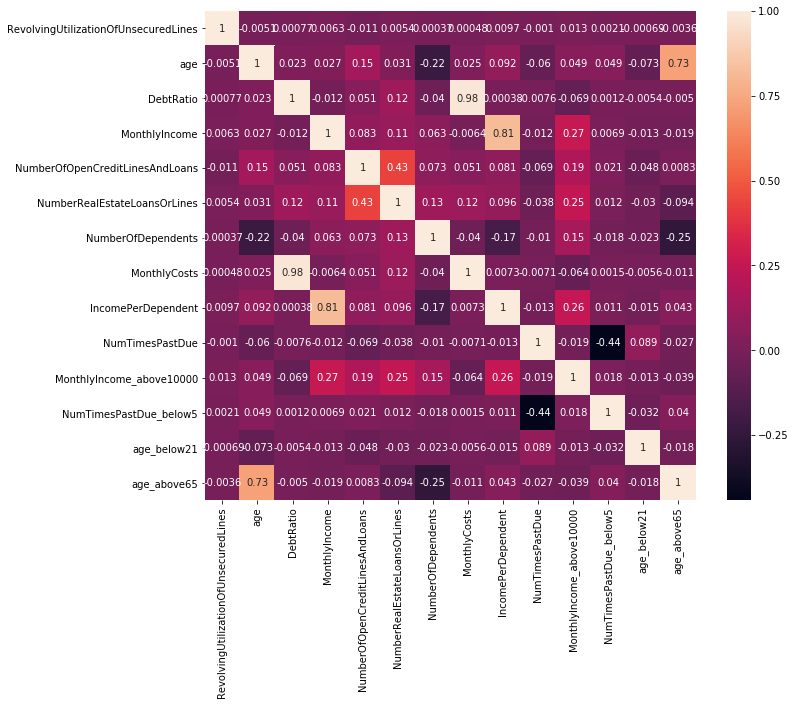

In [49]:
plt.figure(figsize=(11,9))
sns.heatmap(X_train.corr(), annot=True, fmt=".2g")

#### Looks like MonthlyCosts is highly correlated with DebtRatio
- need to refactor in order to include target class in heatmap
    - look at dataframe.sample()

```df_subset = df.sample(2)```

```df.drop(df_subset.index)```
    
    - OR, join target to dataframe now

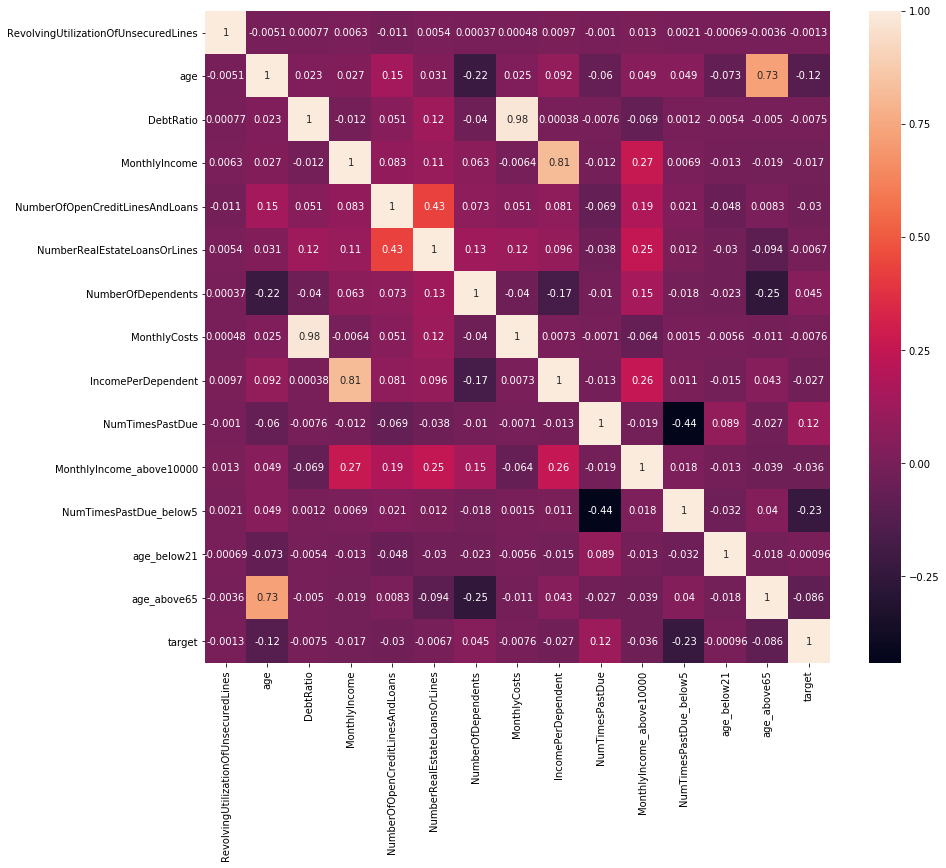

In [50]:
X_train_copy2 = X_train.copy()
X_train_copy2['target'] = y_train
plt.figure(figsize=(14,12))
sns.heatmap(X_train_copy2.corr(), annot=True, fmt=".2g")

#### Because MonthlyCosts correlates highly with DebtRatio, may drop one of those features
- both are equally predictive of the target class
- will drop DebtRatio, as it is slightly less predictive than MonthlyCosts

In [51]:
X_train = X_train.drop('DebtRatio', axis=1)

## Step 9: Preprocessing (getdummies)

In [52]:
# may not be necessary

## Step 10: Encapsulate Cleaning and Feature Engineering

### Cleaning Function for testing set:
- Will continue to add to this function as cleaning and feature engineering are prototyped

In [53]:
def clean_X(dataframe):
    dataframe_copy = dataframe.copy()
    
    # cleaning steps
    dataframe_copy = dataframe_copy.drop('Unnamed: 0', axis=1)
    dataframe_copy = dataframe_copy.reset_index(drop=True)
    dataframe_copy = dataframe_copy.astype(float, copy=True)
    dataframe_copy = mask_dataframe_outliers(dataframe_copy, 1000000)
    age_lookup = pd.DataFrame(dataframe_copy.groupby('age').median())
    age_lookup = pad_dataframe(age_lookup)
    dataframe_copy = replace_dataframe_nans_agemed(dataframe_copy, age_lookup)
    
    # feature engineering steps
    #dataframe_copy = add_incomeoverrevolving_column(dataframe_copy)
    dataframe_copy = add_monthlycosts_column(dataframe_copy)
    dataframe_copy = add_incomeperdependent_column(dataframe_copy)
    dataframe_copy = add_numtimespastdue_column(dataframe_copy)
    dataframe_copy = add_indicator_column(dataframe_copy, 10000, 'MonthlyIncome', direction='above')
    dataframe_copy = add_indicator_column(dataframe_copy, 5, 'NumTimesPastDue', direction='below')
    dataframe_copy = add_indicator_column(dataframe_copy, 21, 'age', direction='below')
    dataframe_copy = add_indicator_column(dataframe_copy, 65, 'age', direction='above')
    
    # dropping multicollinear features
    dataframe_copy = dataframe_copy.drop('DebtRatio', axis=1)
    
    return dataframe_copy

In [54]:
def clean_Y(series):
    series_copy = series.copy()
    series_copy = series_copy.reset_index(drop=True)
    series_copy = series_copy.astype(float, copy=True)
    return series_copy

## Step 11: Fit Scaler and Transform Data


## Step 12: Fit Model and Make Predictions

## Step 13: Evaluate Model on Testing Set

## Step 14: Hypertune Model Parameters

## Step 15: Try Other Models